In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install arviz

     |████████████████████████████████| 1.5MB 5.3MB/s 
     |████████████████████████████████| 4.3MB 15.2MB/s 
     |████████████████████████████████| 737kB 41.9MB/s 
     |████████████████████████████████| 296kB 35.1MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [2]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 4.4MB/s 
  Found existing installation: arviz 0.10.0
    Uninstalling arviz-0.10.0:
      Successfully uninstalled arviz-0.10.0
     |████████████████████████████████| 911kB 5.8MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7
     |████████████████████████████████| 2.8MB 4.2MB/s 
  Created wheel for Theano: filename=Theano-1.0.4-cp36-none-any.whl size=2667178 sha256=585f16ff85bf504f91dd85717c18a54f08f53f8369c3d4366b17d091674183ba
  Stored in directory: /root/.cache/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
#required imports

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import theano.tensor as tt
import seaborn as sns
from datetime import datetime
import io


## Get the data:
pd.core.common.is_list_like = pd.api.types.is_list_like # resolves datareader error
from pandas_datareader import data
# For all libraries please install the necessary libraries 
#If the above fails, you might need to do something like this:
#This is to show how you install pandas-datareader, you might need to do this for all libraries
#conda install pandas-datareader
#or
#pip install pandas-datareader
#Depending on your setup

from IPython.display import Image
from datetime import datetime
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('data.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2015-01-02,111.39,111.44,107.350,109.33,53204626.0,0.0,1.0,105.820966,105.868466,101.982949,103.863957,53204626.0
1,2015-01-05,108.29,108.65,105.410,106.25,64285491.0,0.0,1.0,102.875953,103.217954,100.139941,100.937944,64285491.0
2,2015-01-06,106.54,107.43,104.630,106.26,65797116.0,0.0,1.0,101.213446,102.058949,99.398938,100.947444,65797116.0
3,2015-01-07,107.20,108.20,106.695,107.75,40105934.0,0.0,1.0,101.840448,102.790453,101.360696,102.362951,40105934.0
4,2015-01-08,109.23,112.15,108.700,111.89,59364547.0,0.0,1.0,103.768957,106.542969,103.265455,106.295968,59364547.0


In [5]:
returns=data['Adj. Close'].pct_change()

returns = returns.dropna()*100

Question 1
Plot the returns and draw a histogram to see the distribution

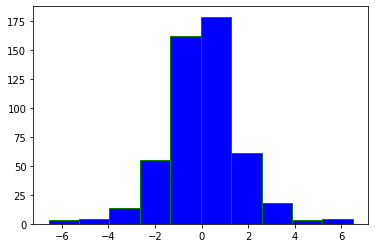

In [6]:
plt.hist(returns, color = 'blue', edgecolor = 'green')
plt.show()

In [7]:
returns.describe()

count    503.000000
mean       0.031662
std        1.579874
min       -6.570657
25%       -0.716921
50%        0.040068
75%        0.850964
max        6.496328
Name: Adj. Close, dtype: float64

In the cell below, the model for daily return simulations is shown. Since the daily returns histogram shows bell-shaped distribution, the normal distribution is used for likelihood computation.
This model uses un-informative priors - Uniform distribution for both parameters of the notmal distribution ("mu" and 'sigma").

In [7]:
with pm.Model() as model_n:
    #Prior
    

    mu = pm.Uniform("mu", lower=-10, upper=10, testval=0)
    sigma = pm.Uniform("sigma", lower=0, upper=6, testval=0.0001)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sd=sigma, observed = returns.values)
    
    #Posterior
    start = pm.find_MAP()
    step  = pm.Metropolis()
    trace = pm.sample(10000, chains=3, cores=1, step=step, start=start, progressbar=True)
    burned_trace = trace[3000::]
    

logp = -969.97, ||grad|| = 483.7: 100%|██████████| 37/37 [00:00<00:00, 1326.71it/s]  
Sequential sampling (3 chains in 1 job)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]
Sampling chain 2, 0 divergences: 100%|██████████| 10500/10500 [00:03<00:00, 2955.39it/s]
The number of effective samples is smaller than 10% for some parameters.


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9b2c2c748>,
      dtype=object)

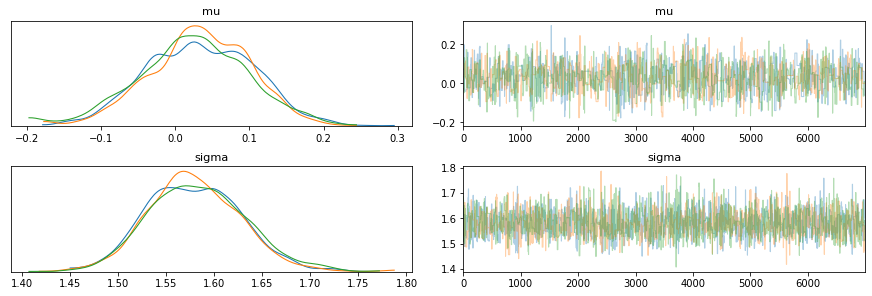

In [8]:
pm.traceplot(burned_trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9b3d68a20>,
      dtype=object)

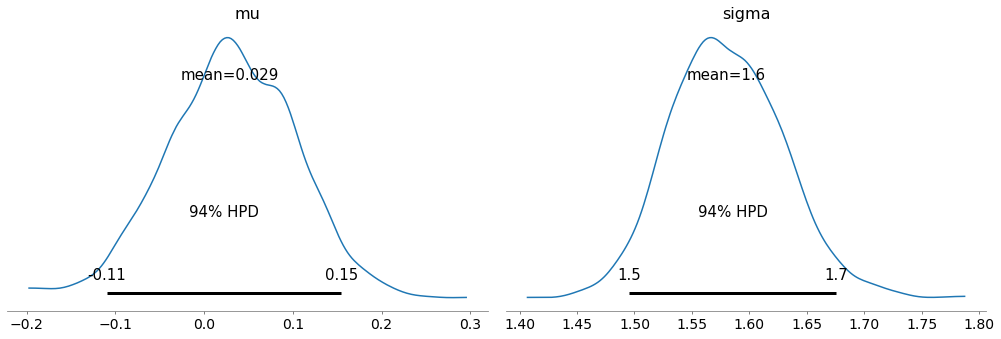

In [9]:
pm.plot_posterior(burned_trace)

In [10]:
pm.summary(burned_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.029,0.072,-0.110,0.155,0.002,0.002,1149.0,897.0,1151.0,1048.0,1.01
sigma,1.580,0.049,1.495,1.676,0.001,0.001,1887.0,1887.0,1859.0,1811.0,1.00


Question 2
Improve the model for daily returns given above. Choose different prior distributions for parameters of the likelihood distribution - Mean  𝜇
μ
  and Standard Deviation  𝜎
σ
 .
To tune the model, try several different distributions with various spread/dispersion values (for example, Uniform, Normal, HalfNormal) for priors, and different numbers of samples. By inspecting posterior distribution of parameters, pick the value that produces the smoothest, most convergent chains.
Present posterior distribution graphically.

In [8]:
# YOUR CODE HERE
with pm.Model() as model_n:
    #Prior
    

    mu = pm.Uniform("mu", lower=-6, upper=6, testval=0)
    sigma = pm.Uniform("sigma", lower=0, upper=5, testval=0.0001)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sd=sigma, observed = returns.values)
    
    #Posterior
    start = pm.find_MAP()
    step  = pm.Metropolis()
    trace = pm.sample(40000, chains=3, cores=1, step=step, start=start, progressbar=True)
    trace_test = trace[3000::]



logp = -947.37, ||grad|| = 2.1823: 100%|██████████| 35/35 [00:00<00:00, 985.80it/s]   
Sequential sampling (3 chains in 1 job)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]
Sampling chain 2, 0 divergences: 100%|██████████| 40500/40500 [00:15<00:00, 2547.58it/s]
The number of effective samples is smaller than 10% for some parameters.


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f0d373908>,
      dtype=object)

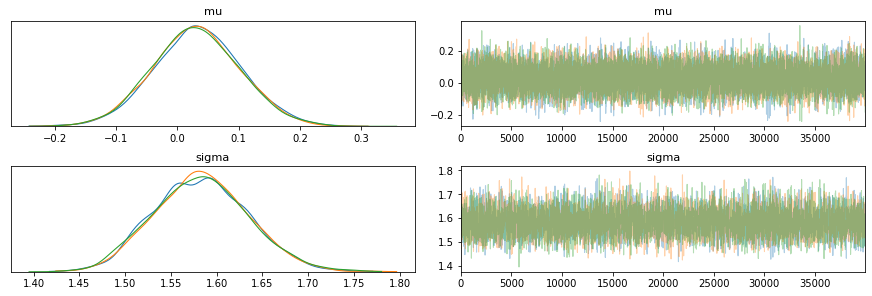

In [9]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f0cea3b00>,
      dtype=object)

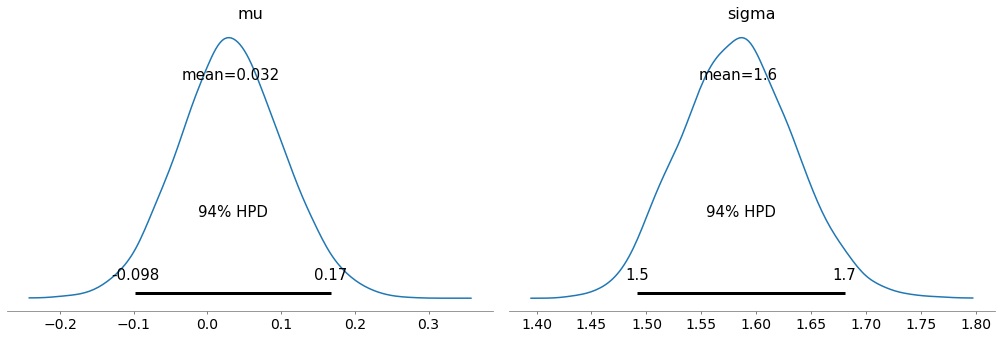

In [10]:
pm.plot_posterior(trace)

/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f0caefa58>,
      dtype=object)

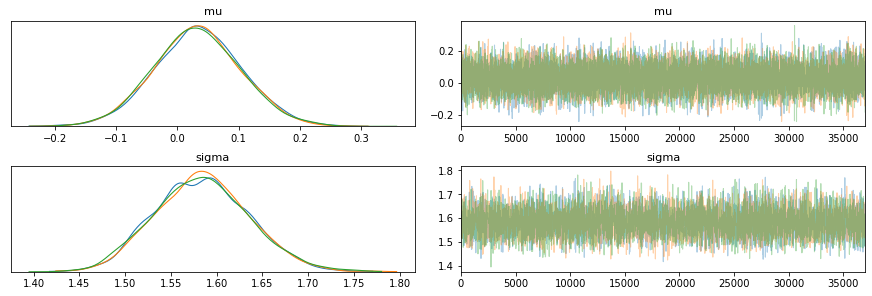

In [11]:
pm.traceplot(trace_test)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f090995c0>,
      dtype=object)

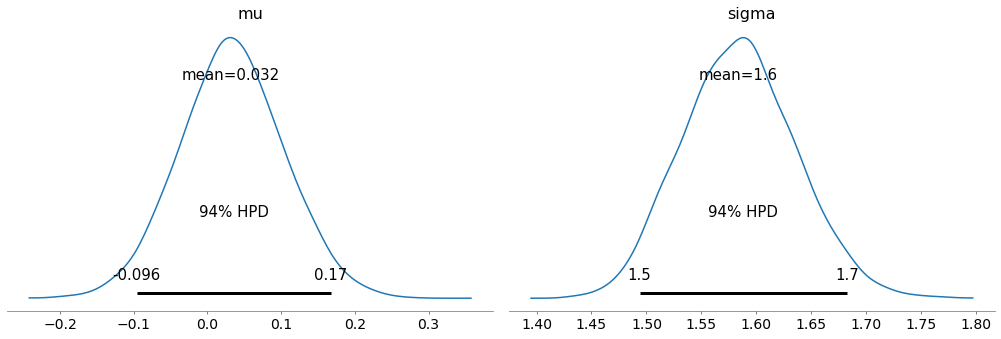

In [12]:
pm.plot_posterior(trace_test)

In [13]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.032,0.070,-0.098,0.167,0.001,0.001,11643.0,9749.0,11599.0,12521.0,1.0
sigma,1.584,0.051,1.492,1.680,0.001,0.000,7159.0,7129.0,7235.0,6776.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f08d33b00>,
      dtype=object)

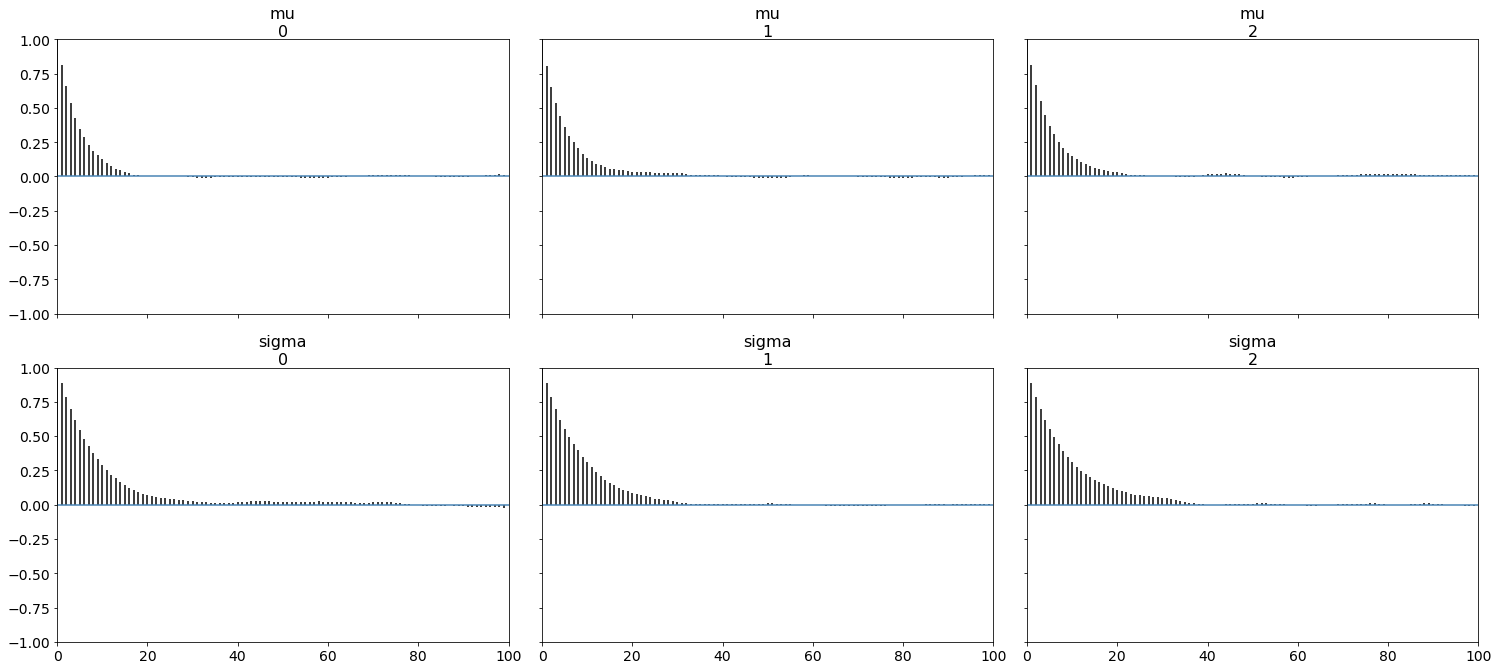

In [14]:
pm.autocorrplot(trace_test)

Question 3
As a validation check of model performance, predict the distribution of daily returns from the obtained posterior distributions. To generate the data, use the pymc3 function for sampling posterior distribution with an appropriately chosen number of samples from the trace.
Present results of predicted distribution graphically as a histogram.

In [15]:
ppc = pm.sample_posterior_predictive(trace_test, samples=1000, model=model_n)
np.asarray(ppc['likelihood']).shape

/usr/local/lib/python3.6/dist-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1000/1000 [00:01<00:00, 605.60it/s]


(1000, 503)

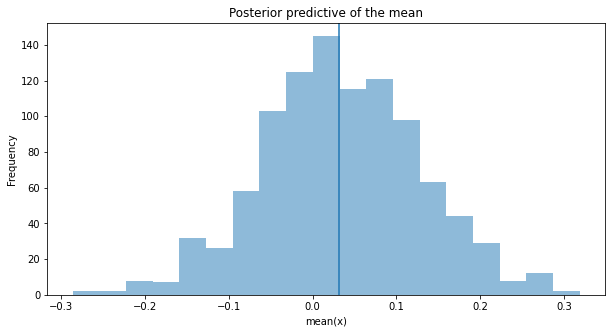

In [16]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([likelihood.mean() for likelihood in ppc['likelihood']], bins=19, alpha=0.5)
ax.axvline(returns.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

Question 4
(a) Identify the parameter of interest in the prediction model. What would be the best prior distribution to produce these parameters?
(b) What is the HDI in the posteriors for the parameters you named in 4a? What number of samples was used to build this model?
(c) Does the data generated when predicting daily returns from posterior distribution deviate significantly from the true distribution?

Q4 a: Uniform distribution seems to be the best prior distribution for this model. 

Q4 b : The 94% HPD ranges from -0.1 to 0.17 with a sample of 40000.


Q4 c: The paramenters of the original data seems to be very close to the estimated data. The mean and sigma are very close to each other. 